In [2]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

pokemon = pd.read_csv('./pokedex/pokemon.csv').sort_values(by=['number'])
pokemon

,generation,number,name,image,type1,type2,height,weight,catch_rate,egg_group1,...,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,total,is_legendary
0,1,1,Bulbasaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,0.7,6.9,45,Grass,...,121,251,65,121,251,45,85,207,318,False
23,1,2,Ivysaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,1.0,13.0,45,Grass,...,148,284,80,148,284,60,112,240,405,False
25,1,3,Venusaur,https://img.pokemondb.net/sprites/bank/normal/...,Grass,Poison,2.0,100.0,45,Grass,...,184,328,100,184,328,80,148,284,525,False
24,1,4,Charmander,https://img.pokemondb.net/sprites/bank/normal/...,Fire,NaN,0.6,8.5,45,Dragon,...,112,240,50,94,218,65,121,251,309,False
22,1,5,Charmeleon,https://img.pokemondb.net/sprites/bank/normal/...,Fire,NaN,1.1,19.0,45,Dragon,...,148,284,65,121,251,80,148,284,405,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,8,894,Regieleki,https://img.pokemondb.net/sprites/sword-shield...,Electric,NaN,1.2,145.0,3,NaN,...,184,328,50,94,218,200,364,548,580,True
184,8,895,Regidrago,https://img.pokemondb.net/sprites/sword-shield...,Dragon,NaN,2.1,200.0,3,NaN,...,184,328,50,94,218,80,148,284,580,True
183,8,896,Glastrier,https://img.pokemondb.net/sprites/sword-shield...,Ice,NaN,2.2,800.0,3,NaN,...,121,251,110,202,350,30,58,174,580,True
182,8,897,Spectrier,https://img.pokemondb.net/sprites/sword-shield...,Ghost,NaN,2.0,44.5,3,NaN,...,265,427,80,148,284,130,238,394,580,True


In [3]:
types = set.union(set(pokemon['type1'].value_counts().keys()), set(pokemon['type2'].value_counts().keys()))
egg_groups = set.union(set(pokemon['egg_group1'].value_counts().keys()), set(pokemon['egg_group2'].value_counts().keys()))
new_types = {k: v+1 for v, k in enumerate(types)}
new_egg_groups = {k: v+1 for v, k in enumerate(egg_groups)}
tf = { True: 1, False: 0}

data = pokemon.drop(columns=['number', 'name', 'image', 'total']) \
    .fillna(value=0) \
    .replace({"type1": new_types, "type2": new_types}) \
    .replace({"egg_group1": new_egg_groups, "egg_group2": new_egg_groups}) \
    .replace({"has_gender": tf, "is_legendary": tf})
data

,generation,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,...,sp_atk,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max,is_legendary
0,1,6,12,0.7,6.9,45,4,11,1,87.5,...,65,121,251,65,121,251,45,85,207,0
23,1,6,12,1.0,13.0,45,4,11,1,87.5,...,80,148,284,80,148,284,60,112,240,0
25,1,6,12,2.0,100.0,45,4,11,1,87.5,...,100,184,328,100,184,328,80,148,284,0
24,1,2,0,0.6,8.5,45,2,11,1,87.5,...,60,112,240,50,94,218,65,121,251,0
22,1,2,0,1.1,19.0,45,2,11,1,87.5,...,80,148,284,65,121,251,80,148,284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,8,14,0,1.2,145.0,3,0,0,0,0.0,...,100,184,328,50,94,218,200,364,548,1
184,8,1,0,2.1,200.0,3,0,0,0,0.0,...,100,184,328,50,94,218,80,148,284,1
183,8,3,0,2.2,800.0,3,0,0,0,0.0,...,65,121,251,110,202,350,30,58,174,1
182,8,16,0,2.0,44.5,3,0,0,0,0.0,...,145,265,427,80,148,284,130,238,394,1


In [4]:
d = data.drop(columns=['generation', 'is_legendary'])
scaler = StandardScaler()
scaler.fit(d)
X_scale = scaler.transform(d)
scaled_data = pd.DataFrame(X_scale, columns=d.columns)
scaled_data.head()

,type1,type2,height,weight,catch_rate,egg_group1,egg_group2,has_gender,male,hp,...,defense_max,sp_atk,sp_atk_min,sp_atk_max,sp_def,sp_def_min,sp_def_max,speed,speed_min,speed_max
0,-0.667804,0.926944,-0.393965,-0.475111,-0.689092,-0.759754,2.502673,0.396505,1.492357,-0.917252,...,-0.773323,-0.159472,-0.159382,-0.161166,-0.181365,-0.181376,-0.183270,-0.736514,-0.736455,-0.738638
1,-0.667804,0.926944,-0.150761,-0.425128,-0.689092,-0.759754,2.502673,0.396505,1.492357,-0.344713,...,-0.297035,0.351492,0.351509,0.349636,0.372726,0.372693,0.370803,-0.209174,-0.209167,-0.211527
2,-0.667804,0.926944,0.659918,0.287747,-0.689092,-0.759754,2.502673,0.396505,1.492357,0.418671,...,0.378988,1.032778,1.032696,1.030705,1.111514,1.111453,1.109567,0.493945,0.493884,0.491287
3,-1.557219,-0.814773,-0.475032,-0.462001,-0.689092,-1.237192,2.502673,0.396505,1.492357,-1.146267,...,-0.973057,-0.329794,-0.329679,-0.331434,-0.735456,-0.735446,-0.737343,-0.033394,-0.033404,-0.035824
4,-1.557219,-0.814773,-0.069693,-0.375964,-0.689092,-1.237192,2.502673,0.396505,1.492357,-0.421052,...,-0.466040,0.351492,0.351509,0.349636,-0.181365,-0.181376,-0.183270,0.493945,0.493884,0.491287


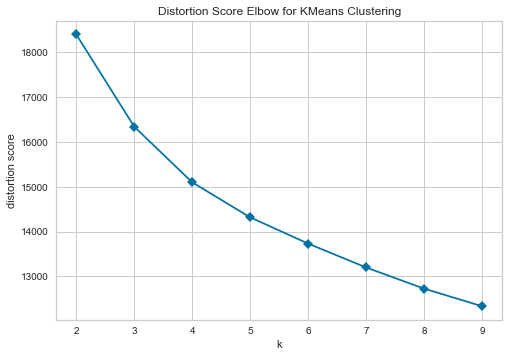

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model = KMeans(init="k-means++", random_state=42, max_iter=10000)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False, locate_elbow=False)
visualizer.fit(scaled_data)
visualizer.show()

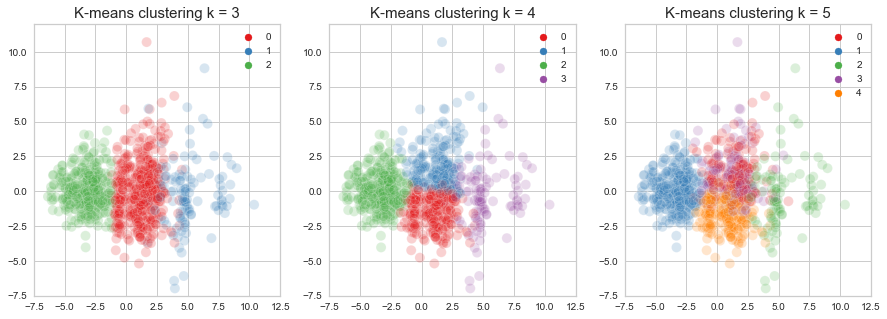

In [6]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

for k in range(3, 6):
    ax = axes.flat[k-3]
    ax.set_xlim([-7.5, 12.5])
    ax.set_ylim([-7.5, 12])    
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42, max_iter=10000).fit(scaled_data)
    d = PCA(n_components=2).fit_transform(scaled_data)
    sns.scatterplot(x=d[:,0], y=d[:,1], 
                hue=kmeans.labels_, 
                palette='Set1',
                s=100, alpha=0.2, ax=ax).set_title(f"K-means clustering k = {k}", fontsize=15)

with open('./map/pokemons.json', 'w') as f:
    f.write(pokemon[['number', 'name', 'image', 'generation']].to_json(orient="records"))
with open('./map/points.json', 'w') as f:
    json.dump(d.tolist(), f)

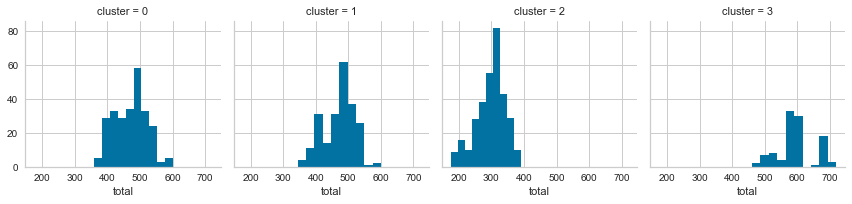

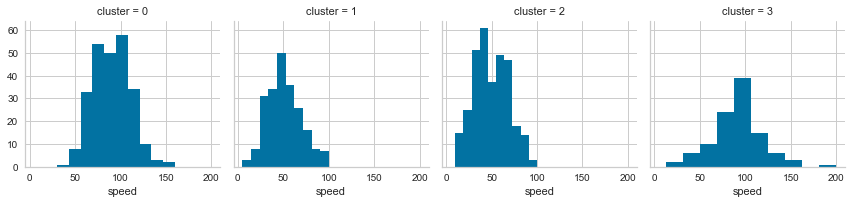

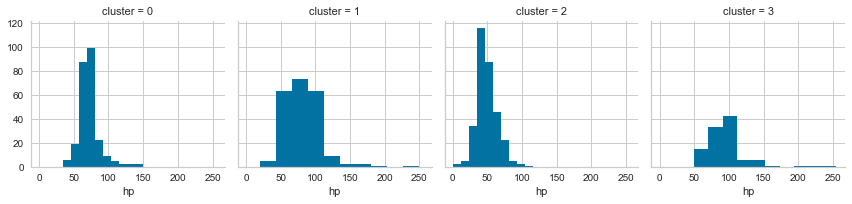

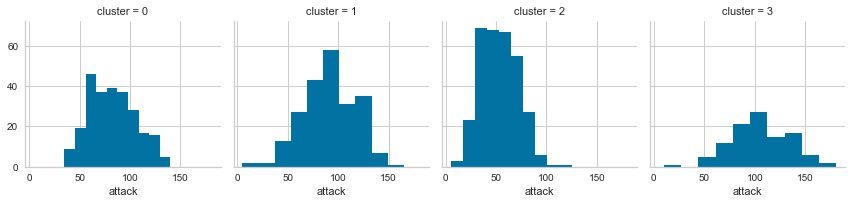

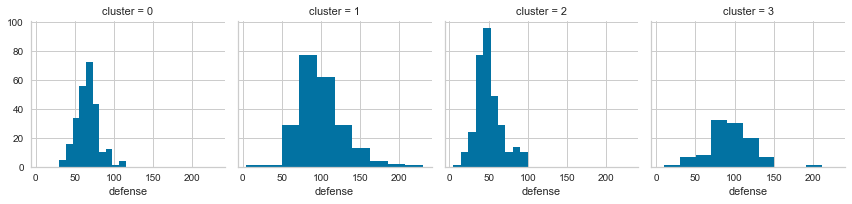

In [7]:
kmeans = KMeans(init="k-means++", n_clusters=4, random_state=42, max_iter=10000).fit(scaled_data)

d = pokemon.copy()
d['cluster'] = kmeans.labels_
for col in ['total', 'speed', 'hp', 'attack', 'defense']:
    g = sns.FacetGrid(d, col='cluster')
    g.map(plt.hist, col)

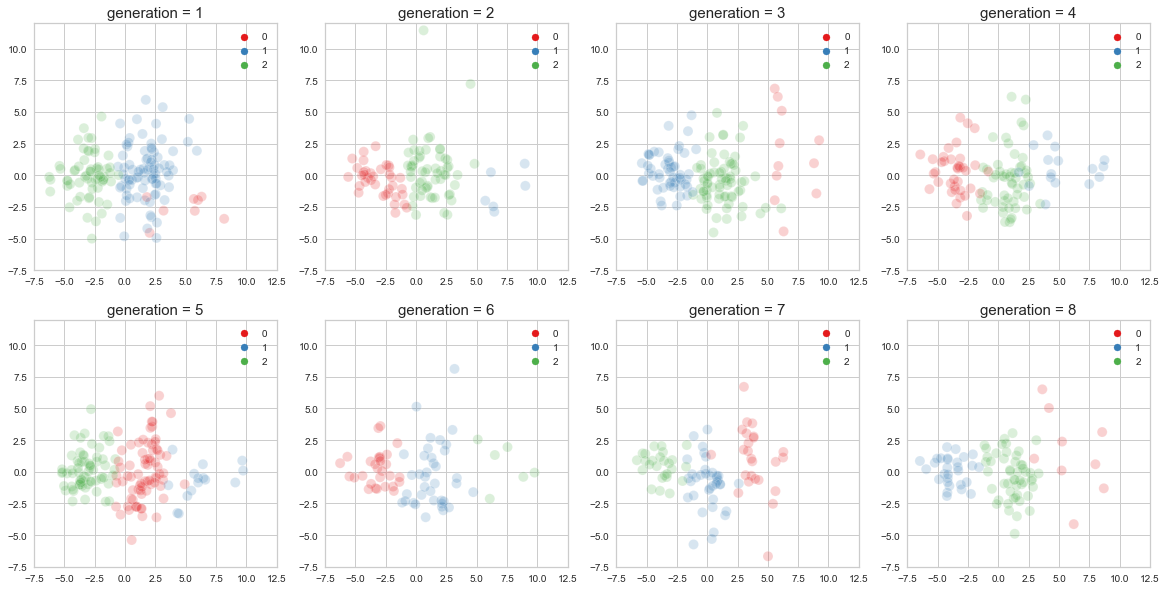

In [8]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

for gen in range(1, 9):
    ax = axes.flat[gen-1]
    ax.set_xlim([-7.5, 12.5])
    ax.set_ylim([-7.5, 12])
    
    d1 = data[data['generation']==gen].drop(columns=['generation'])
    scaler = StandardScaler()
    scaler.fit(d1)
    d2 = pd.DataFrame(scaler.transform(d1), columns=d1.columns)

    k = 3
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=42, max_iter=10000).fit(d2)
    d3 = PCA(n_components=2).fit_transform(d2)

    sns.scatterplot(x=d3[:,0], y=d3[:,1], 
                    hue=kmeans.labels_, 
                    palette='Set1',
                    s=100, alpha=0.2,ax=ax).set_title(f"generation = {gen}", fontsize=15)

In [9]:
d[d['cluster']==0]['is_legendary'].value_counts()

False    246
True       7
Name: is_legendary, dtype: int64

In [10]:
d['is_legendary'].value_counts()

False    806
True      92
Name: is_legendary, dtype: int64